In [1]:
from keras.datasets import cifar10
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
num_classes = 10

In [0]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)

(50000, 32, 32, 3)


In [5]:
y_train.shape  #원핫인코딩으로 10개로 만든다

(50000, 1)

In [0]:
X_train_n = X_train.copy()
y_train_n = y_train.copy()

In [0]:
X_train = X_train.reshape(50000, 32,32,3).astype('float32')/255.0
X_test = X_test.reshape(10000, 32,32,3).astype('float32')/255.0

In [8]:
img_num = y_train[:15,0]
img_num

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9], dtype=uint8)

label=[6 9 9 4 1 1 2 7 8 3]


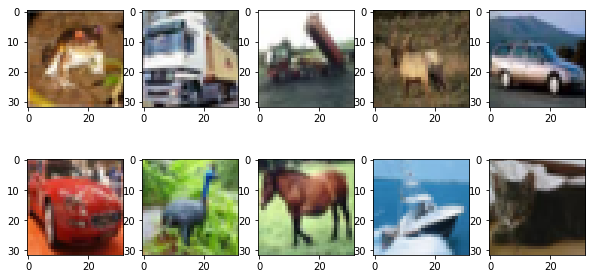

In [9]:
print('label={}'.format(y_train[:10,0]))
fig, ax = plt.subplots(2,5,figsize=(10,5))

for i in range(5):
  ax[0][i].imshow(np.reshape(X_train[i], (32,32,3)))
  ax[1][i].imshow(np.reshape(X_train[i+5], (32,32,3)))

In [0]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
print(y_train.shape)

(50000, 10)


In [0]:
X = tf.placeholder(tf.float32, [None, 32, 32, 3])  
Y = tf.placeholder(tf.float32, [None,10])
keep_prob = tf.placeholder(tf.float32)


In [13]:
W1 = tf.Variable(tf.random_normal([3,3,3,32], stddev=0.01))
L1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob)
print(L1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Tensor("dropout/mul_1:0", shape=(?, 16, 16, 32), dtype=float32)


In [14]:
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob)

print(L2)

Tensor("dropout_1/mul_1:0", shape=(?, 8, 8, 64), dtype=float32)


In [15]:
W3 = tf.Variable(tf.random_normal([3,3,64, 128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1,1,1,1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob)

print(L3)

Tensor("dropout_2/mul_1:0", shape=(?, 4, 4, 128), dtype=float32)


In [16]:
W4 = tf.Variable(tf.random_normal([4 * 4 * 128, 256], stddev=0.01))
L4 = tf.reshape(L3, [-1, 4 *4 * 128])
L4 = tf.matmul(L4, W4)
L4 = tf.nn.relu(L4)
print(L4)

Tensor("Relu_3:0", shape=(?, 256), dtype=float32)


In [17]:
W5 = tf.Variable(tf.random_normal([256,10], stddev=0.01))
model = tf.matmul(L4, W5)
model

<tf.Tensor 'MatMul_1:0' shape=(?, 10) dtype=float32>

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
batch_size = 100
total_batch = int(X_train.shape[0]/ batch_size)
total_batch
epochs = 20

In [0]:
def next_batch(start, num, data, labels):
  data_X = data[start:start+num]
  data_y = labels[start:start+num]
  return np.asarray(data_X), np.asarray(data_y)

In [22]:
print(X_train.shape, y_train.shape)
batch_X, batch_y = next_batch(0,10, X_train, y_train)
print(batch_X.shape, batch_y.shape)

(50000, 32, 32, 3) (50000, 10)
(10, 32, 32, 3) (10, 10)


In [23]:
total_cost = 0
epoch = 0
print("전체 입력 데이터 : {}".format(X_train.shape))
print("전체 출력 데이터 : {}".format(y_train.shape))

for epoch in range(20):
  total_cost = 0
  for i in range(total_batch):
    batch_xs, batch_ys = next_batch(batch_size*i, batch_size, X_train, y_train)
    batch_xs = batch_xs.reshape(-1, 32, 32, 3)
    _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys, keep_prob:0.8})
    total_cost += cost_val
    if (i==0 or i==total_batch-1):
      print('data_step = {}, Avg. cost = {:.3f}'.format(i, cost_val))
  print('epoch: {} total.cost = {:.3f}'.format(epoch, total_cost))

전체 입력 데이터 : (50000, 32, 32, 3)
전체 출력 데이터 : (50000, 10)
data_step = 0, Avg. cost = 2.303
data_step = 499, Avg. cost = 1.674
epoch: 0 total.cost = 950.039
data_step = 0, Avg. cost = 1.620
data_step = 499, Avg. cost = 1.451
epoch: 1 total.cost = 751.631
data_step = 0, Avg. cost = 1.382
data_step = 499, Avg. cost = 1.493
epoch: 2 total.cost = 676.739
data_step = 0, Avg. cost = 1.225
data_step = 499, Avg. cost = 1.270
epoch: 3 total.cost = 620.419
data_step = 0, Avg. cost = 1.131
data_step = 499, Avg. cost = 1.268
epoch: 4 total.cost = 569.597
data_step = 0, Avg. cost = 1.057
data_step = 499, Avg. cost = 1.060
epoch: 5 total.cost = 529.809
data_step = 0, Avg. cost = 0.941
data_step = 499, Avg. cost = 0.946
epoch: 6 total.cost = 498.266
data_step = 0, Avg. cost = 0.933
data_step = 499, Avg. cost = 0.959
epoch: 7 total.cost = 470.544
data_step = 0, Avg. cost = 0.816
data_step = 499, Avg. cost = 0.815
epoch: 8 total.cost = 445.981
data_step = 0, Avg. cost = 0.733
data_step = 499, Avg. cost = 0

In [24]:
print(X_test.shape, y_test.shape)

(10000, 32, 32, 3) (10000, 10)


In [25]:
is_correct = tf.equal(tf.argmax(model,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도 : ', sess.run(accuracy,
                        feed_dict={X:X_train.reshape(-1,32,32,3),
                                  Y:y_train,
                                  keep_prob:0.8}))

정확도 :  0.80732


In [26]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                          feed_dict={X: X_test.reshape(-1, 32, 32, 3),
                                     Y: y_test,
                                    keep_prob:1}))

정확도: 0.7489


In [0]:
import cv2

In [0]:
image_w = 32
image_h = 32


In [39]:
img = cv2.imread('/content/cat.jpg')
print(img.shape)

(338, 550, 3)


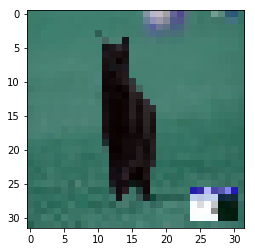

In [43]:
plt.imshow(img)

In [0]:
img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])

(32, 32, 3)

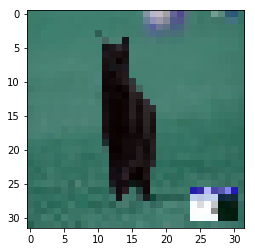

In [45]:
plt.imshow(img)
img.shape

In [46]:
img_re = img.reshape(1, 32*32*3)
img_re

array([[ 60, 124, 105, ...,  51, 112, 102]], dtype=uint8)

In [48]:
result = tf.argmax(model, 1)
res_idx = sess.run(result, feed_dict={X: img_re.reshape(-1, 32, 32, 3), keep_prob:1})
print('예측 레이블 :', label_names[res_idx[0]])

예측 레이블 : bird
